<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/Naive_baye1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Implementation of Naive Baye's Algorithm in Python**


In [2]:
from sklearn.datasets import load_wine
dataset=load_wine()
dataset

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [3]:
import pandas as pd
df_wine=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_wine['Wine Class']=dataset['target']
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
from sklearn.model_selection import train_test_split
feature=df_wine.loc[:,'alcohol':'proline']
target=df_wine.loc[:,'Wine Class']
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.30,random_state=1)

In [5]:
print('Xtrain shape',xtrain.shape)
print('Ytrain shape',ytrain.shape)
print('Ytest shape',ytrain.shape)

Xtrain shape (124, 13)
Ytrain shape (124,)
Ytest shape (124,)


In [6]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
pv=model.predict(xtest)
pv

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [12]:
print(ytest.iloc[:5],end=' ')

161    2
117    1
19     0
69     1
53     0
Name: Wine Class, dtype: int64 

In [13]:
predicted_prob=model.predict_proba(xtest)
predicted_prob[1:10,:]

array([[4.75922918e-08, 9.99999952e-01, 1.99557221e-15],
       [9.99991276e-01, 8.72445869e-06, 1.20267228e-28],
       [3.39535973e-11, 1.00000000e+00, 7.22790711e-22],
       [1.00000000e+00, 5.94168840e-13, 2.53879649e-33],
       [6.61743792e-23, 1.75566399e-06, 9.99998244e-01],
       [4.45754828e-12, 1.00000000e+00, 9.17118062e-13],
       [1.00000000e+00, 2.49619650e-18, 1.12647833e-55],
       [1.48271444e-22, 3.16228670e-08, 9.99999968e-01],
       [2.42949462e-12, 9.99989656e-01, 1.03437919e-05]])

In [14]:
from sklearn.metrics import  confusion_matrix, accuracy_score
accuracy=accuracy_score(ytest,pv)
accuracy

0.9814814814814815

In [15]:
cm=confusion_matrix(ytest,pv)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]])

In [16]:
multimodel=MultinomialNB()
bmodel=BernoulliNB()
l=[model,multimodel,bmodel]
ac=[]
for i in range(len(l)):
  l[i].fit(xtrain,ytrain)
  print(l[i])
  ac.append(accuracy_score(ytest,l[i].predict(xtest)))
ac
  

GaussianNB(priors=None, var_smoothing=1e-09)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


[0.9814814814814815, 0.8703703703703703, 0.35185185185185186]

<BarContainer object of 3 artists>

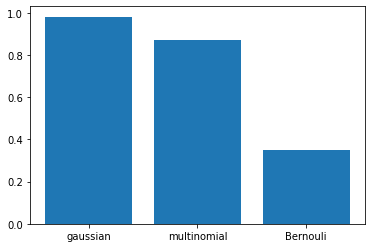

In [17]:
import matplotlib.pyplot as plt
plt.bar(['gaussian','multinomial','Bernouli'],ac)